**Introduction**

Machine learning (ML) is a rapidly evolving field that has the potential to revolutionize many industries, including healthcare. ML algorithms can be used to learn from large datasets of data and identify patterns that would be difficult or impossible for humans to find on their own. This makes ML ideal for a variety of tasks in healthcare, such as developing new diagnostic tools and predicting patient outcomes.

One area where ML is having a major impact is in the field of RNA sequencing (RNA-seq). RNA-seq is a powerful technology that allows scientists to measure the expression of all the genes in a cell at once. This information can be used to identify biomarkers for disease, understand the molecular mechanisms of cancer, and develop new personalized treatments.

ML algorithms can be used to analyze RNA-seq data to identify biomarkers for cancer and other diseases. ML can also be used to develop diagnostic tools that are more accurate and sensitive than traditional methods. For example, ML algorithms have been used to develop diagnostic tests for breast cancer, kidney cancer, and lung cancer that are more accurate than traditional methods such as mammography and biopsy.

**Problem statement**

Breast invasive carcinoma, kidney clear cell carcinoma, and lung adenocarcinoma are three of the most common types of cancer. Early detection and treatment of these cancers is essential for improving patient outcomes. However, traditional diagnostic methods for these cancers are not always accurate or sensitive.

Machine learning assisted RNA sequencing based diagnostics have the potential to overcome the limitations of traditional diagnostic methods. ML algorithms can be used to analyze RNA-seq data to identify biomarkers for these cancers and develop diagnostic tools that are more accurate and sensitive.

**Benefits of ML-assisted RNA-seq based diagnostics**

Machine learning assisted RNA sequencing based diagnostics offer a number of benefits over traditional diagnostic methods, including:

  * Improved accuracy and sensitivity: ML algorithms can be trained on large datasets of RNA-seq data to identify biomarkers for cancer with high accuracy and sensitivity. This means that machine learning assisted RNA sequencing based diagnostics can detect cancer earlier and more accurately than traditional methods.
  * Reduced invasiveness: RNA-seq can be performed on liquid biopsies, such as blood or urine. This means that ML-assisted RNA-seq based diagnostics can be used to diagnose cancer without the need for invasive procedures such as biopsies.
  * Personalization: Machine learning assisted RNA sequencing based diagnostics can be used to develop personalized diagnostic tools that are tailored to the individual patient's tumor. This can help to improve the accuracy of diagnosis and guide treatment decisions.


# Importations

In [ ]:
# importation

# preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# dimentionality reduction
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# evaluations
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

# others
from sklearn.tree import export_text
import plotly.graph_objects as go

# Data Preprocessings

## Features Importation and Preprocessing

We extracted features into a Pandas DataFrame named `train_data.` We then transposed the DataFrame (swapped the rows and columns). We then used the Pandas `dropna()` and `drop_duplicates()` functions to preprocess the data. In the end, we had a processed DataFrame consisting of 1845 samples and 16340 features.

In [ ]:
import pandas as pd

# Import the training data
train_data = pd.read_csv("/data/train_data.tsv", sep='\t')

# Transpose the DataFrame
train_data = train_data.T

# Remove the last row
train_data = train_data.tail(-1)

# Print the shape of the DataFrame before processing
print("Before processing: ",train_data.shape)

# Drop rows with missing values
train_data_1 = train_data.dropna()

# Print the shape of the DataFrame after dropping rows with missing values
print("After_1 processing: ",train_data_1.shape)

# Drop duplicate rows
train_data_1.drop_duplicates(inplace = True)

# Print the shape of the DataFrame after dropping duplicate rows
print("After_2 processing: ",train_data_1.shape)

Before processing:  (1845, 16340)
After_1 processing:  (1845, 16340)
After_2 processing:  (1845, 16340)


## Labels importation

We imported and extracted the data labels into a Pandas DataFrame `train_labels`. The DataFrame was extracted from a column named `X_primary_disease` in the metadata file. There were 1845 labels spanning between three cancer classes including `Breast invasive carcinoma`, `kidney clear cell carcinoma`, and `lung adenocarcinoma`.

In [ ]:
#labels importation and preprocessing
train_labels = pd.read_csv("/train_label.tsv", sep='\t')
train_labels = train_labels.X_primary_disease
train_labels.shape

(1845,)

## Splitting Dataset

The features and labels parameters are the input and output variables of the dataset, respectively. The test_size parameter specifies the proportion of the dataset to be used for the test set. The random_state parameter is used to ensure that the split is reproducible.

The train_test_split() function returns four variables:

* X_train: The training data features
* X_test: The test data features
* y_train: The training data labels
* y_test: The test data labels

The test_size parameter is set to 0.33, which means that 33% of the dataset will be used for the test set. The random_state parameter is set to 40, which ensures that the split is reproducible.

In [ ]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.33, random_state=40)

(1236, 16340)

# Dimentionality Reduction

## Optimizing the PCA

Optimizing the PCA through GridSearchCV can help to improve the performance of the machine learning model. GridSearchCV can be used to optimize the PCA by finding the best value for the n_components parameter. The `n_components` parameter specifies the number of principal components to retain. A higher value of n_components will retain more information from the original data, but it will also make the model more complex and more likely to overfit. A lower value of n_components will reduce the complexity of the model, but it will also lose information from the original data.

To use GridSearchCV to optimize the PCA, you would first need to create a pipeline that consists of the PCA transformer and the machine learning model that you want to use. The result of the analysis shows `'pca__n_components': 30` is a best parameter with `99% accuracy`.

In [ ]:
# optimizing the PCA

pca = PCA()
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1)
#svm = SVC(gamma='auto')

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

param_grid = { "pca__n_components": [5, 15, 30, 40, 60] }

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.999):
{'pca__n_components': 30}


<ipython-input-7-c723cac4dd0c>:21: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  best_clfs = results.groupby(components_col).apply(


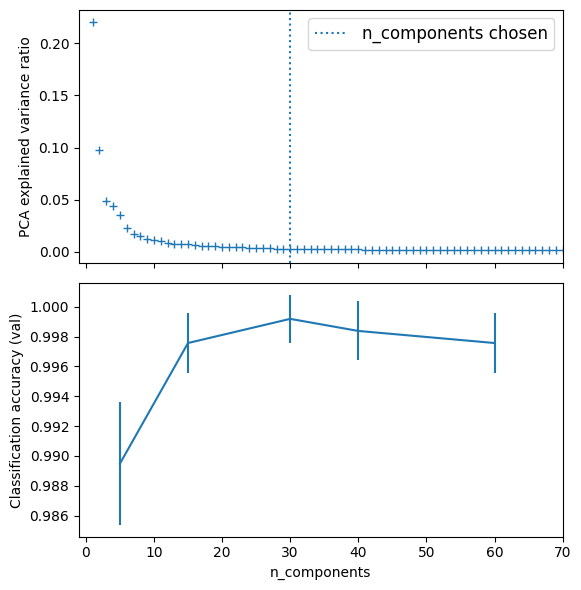

In [ ]:
# Plot the PCA spectrum

pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()